<a href="https://colab.research.google.com/github/cmlohr/research_data/blob/add-license-1/Handwashing_Discovery_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Data Source

Dr Semmelweis published his research in 1861. http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861 

[English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).


In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 312kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Import Statements

In [53]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [8]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

In [9]:
print(df_yearly.shape)
df_yearly

(12, 4)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [10]:
print(df_monthly.shape)
df_monthly.tail()

(98, 3)


,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


### Check for Nan Values and Duplicates

In [11]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [12]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


### Descriptive Statistics

In [13]:
print(f'Yearly duplicates? {df_yearly.duplicated().values.any()}')

Yearly duplicates? False


In [14]:
print(f'Monthly duplicates {df_monthly.duplicated().values.any()}')

Monthly duplicates False


In [15]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [16]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [18]:
probability = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f"Chance of dying in 1840's Vienna: {probability:.3}%")

Chance of dying in 1840's Vienna: 7.08%


# Number of Births & Deaths


In [22]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

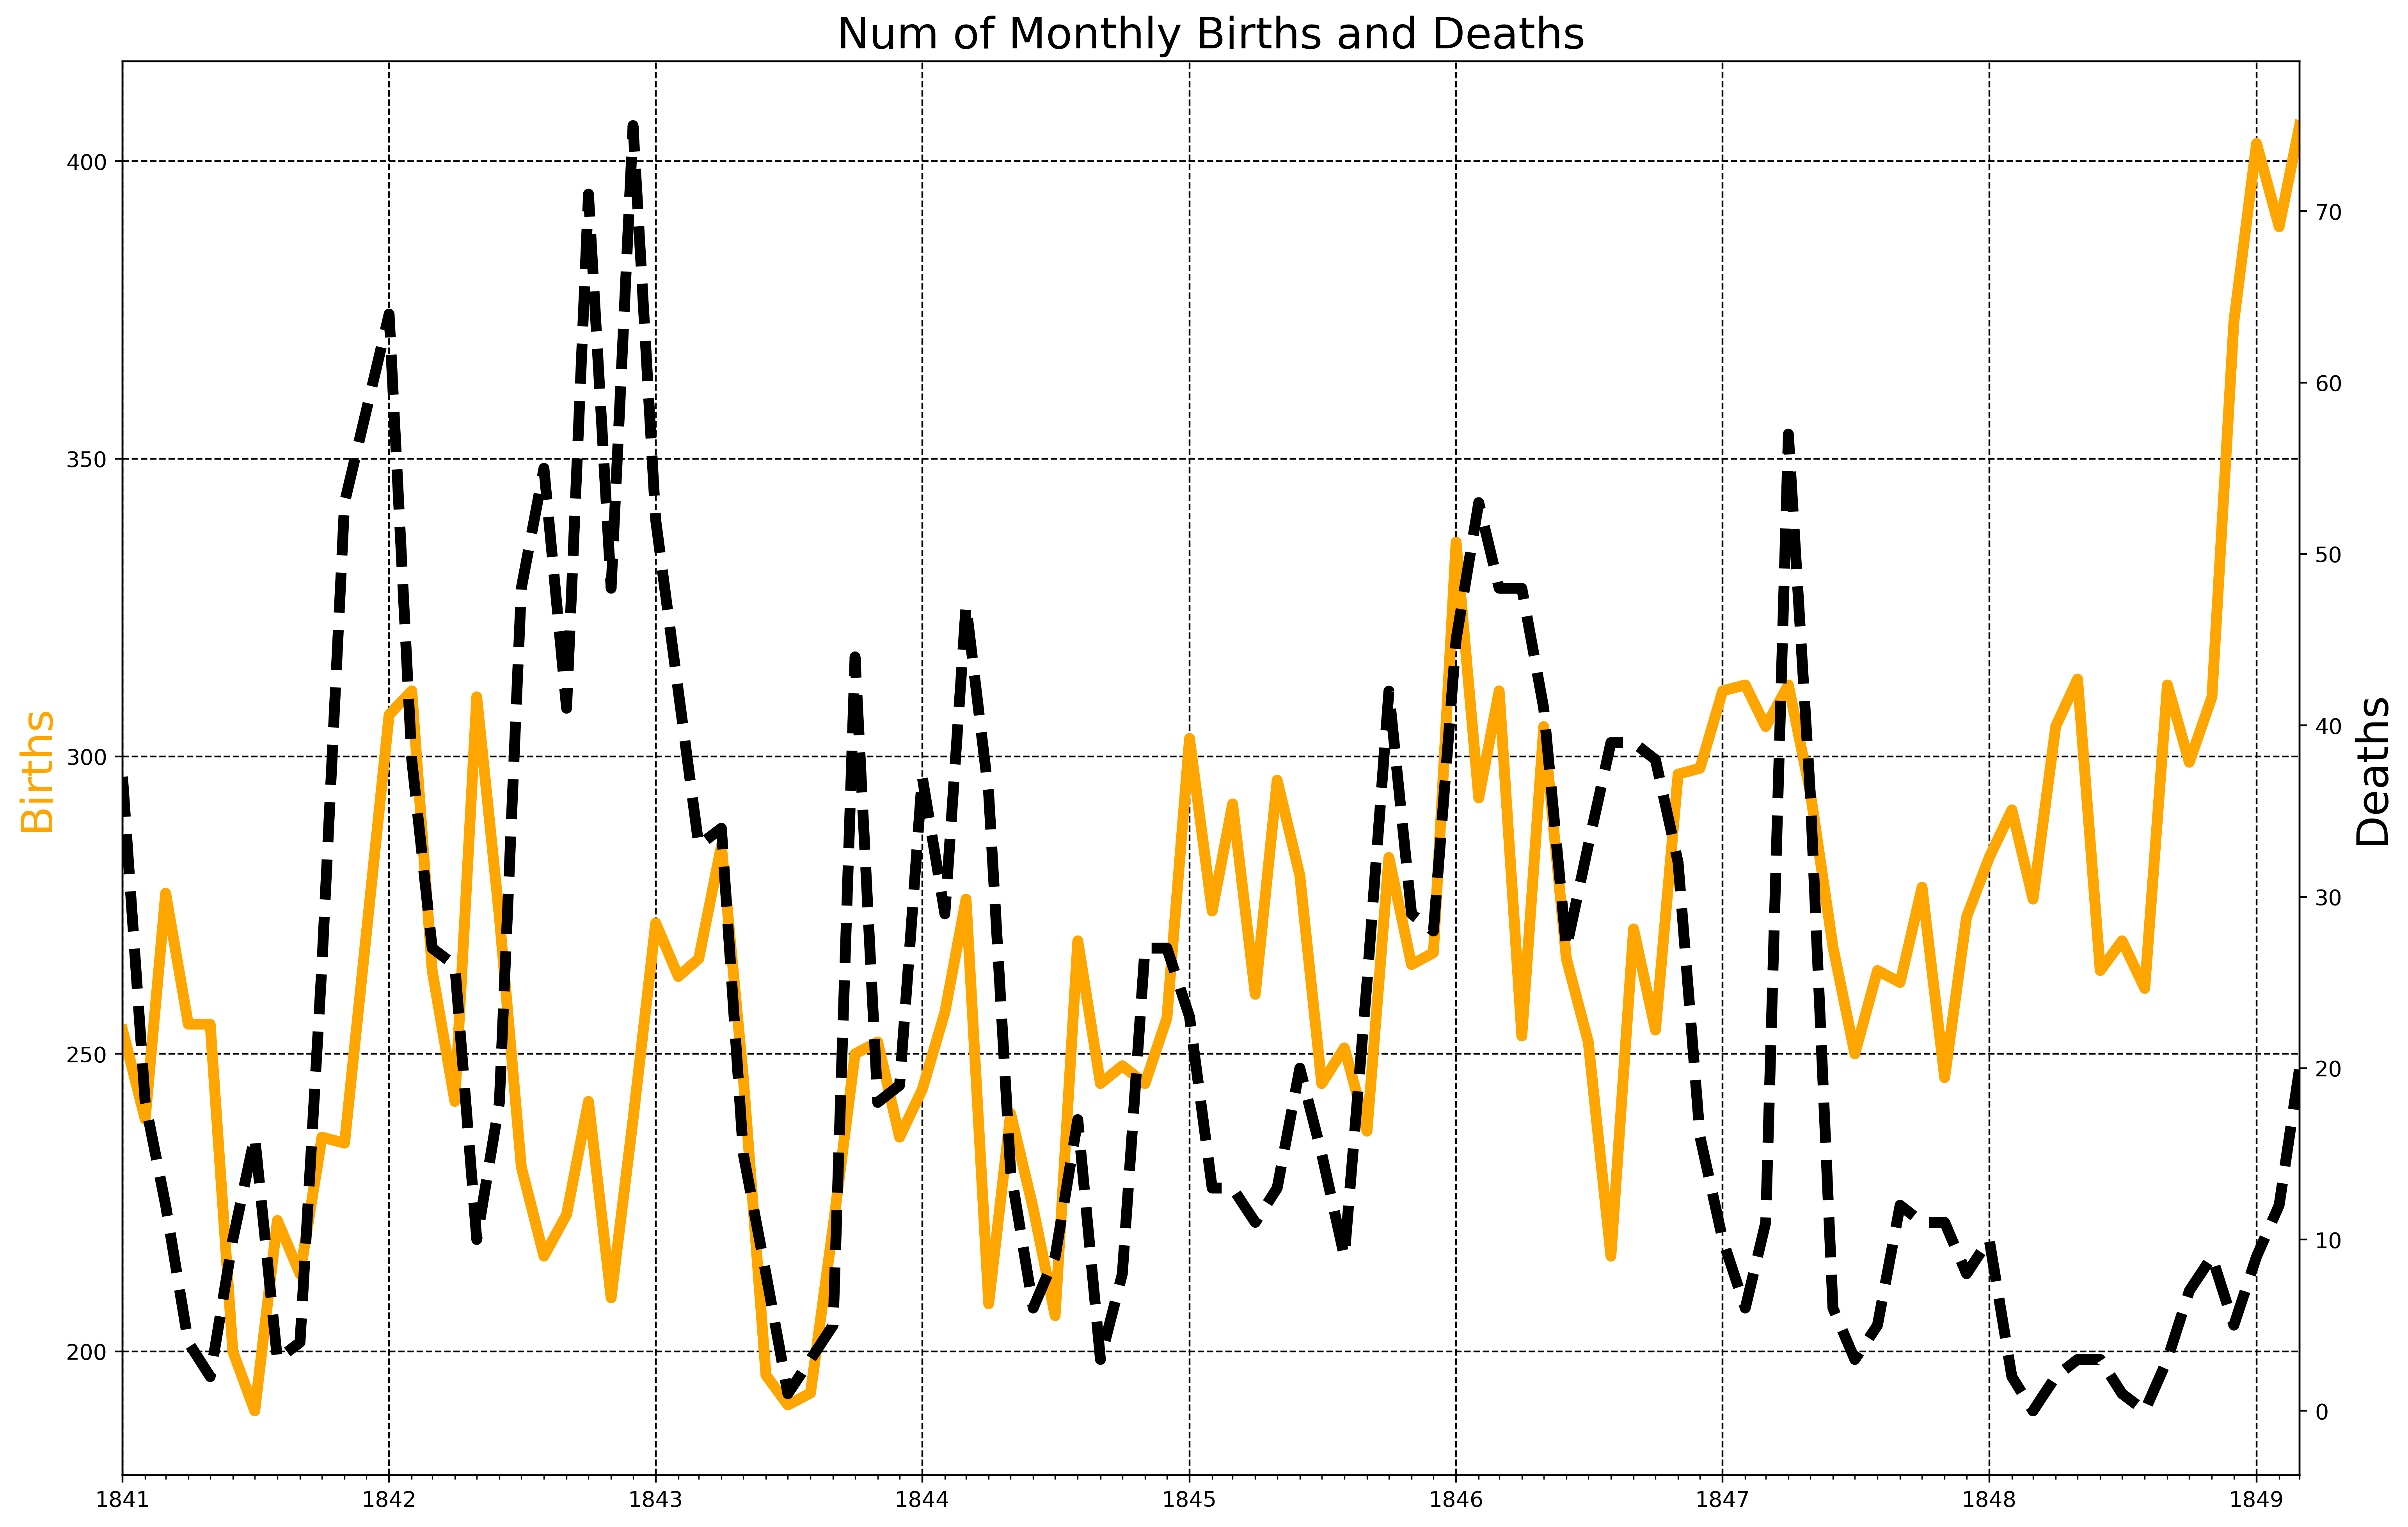

In [23]:

plt.figure(figsize=(18,12), dpi=400)
plt.title('Num of Monthly Births and Deaths', fontsize=20)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color='orange', fontsize=20)
ax2.set_ylabel('Deaths', color='black', fontsize=20)

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='black', linestyle='--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='orange',
         linewidth=5)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='black',
         linewidth=5,
         linestyle='--')

plt.show()

In [24]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Yearly Births by Clinic')
line.show()

In [25]:
new_line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title='Yearly Deaths by Clinic')

new_line.show()

In [28]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [30]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [31]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


In [32]:
prop_d_clinic_line = px.line(df_yearly,
                             x='year',
                             y='pct_deaths',
                             color='clinic',
                             title='Proportion of Yearly Deaths by Clinic')

prop_d_clinic_line.show()

### Calculate the Proportion of Deaths at Each Clinic

In [34]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [38]:
# handwashing made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [41]:
b_wash = df_monthly[df_monthly.date < handwashing_start]
a_wash = df_monthly[df_monthly.date >= handwashing_start]

### Plotting the Proportion of Yearly Deaths by Clinic

In [42]:
bw_rate = b_wash.deaths.sum() / b_wash.births.sum() * 100
aw_rate = a_wash.deaths.sum() / a_wash.births.sum() * 100
print(f'Average death rate before 1847: {bw_rate:.4}%')
print(f'Average death rate after 1847: {aw_rate:.3}%')

Average death rate before 1847: 10.53%
Average death rate after 1847: 2.15%


In [43]:
roll_df = b_wash.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

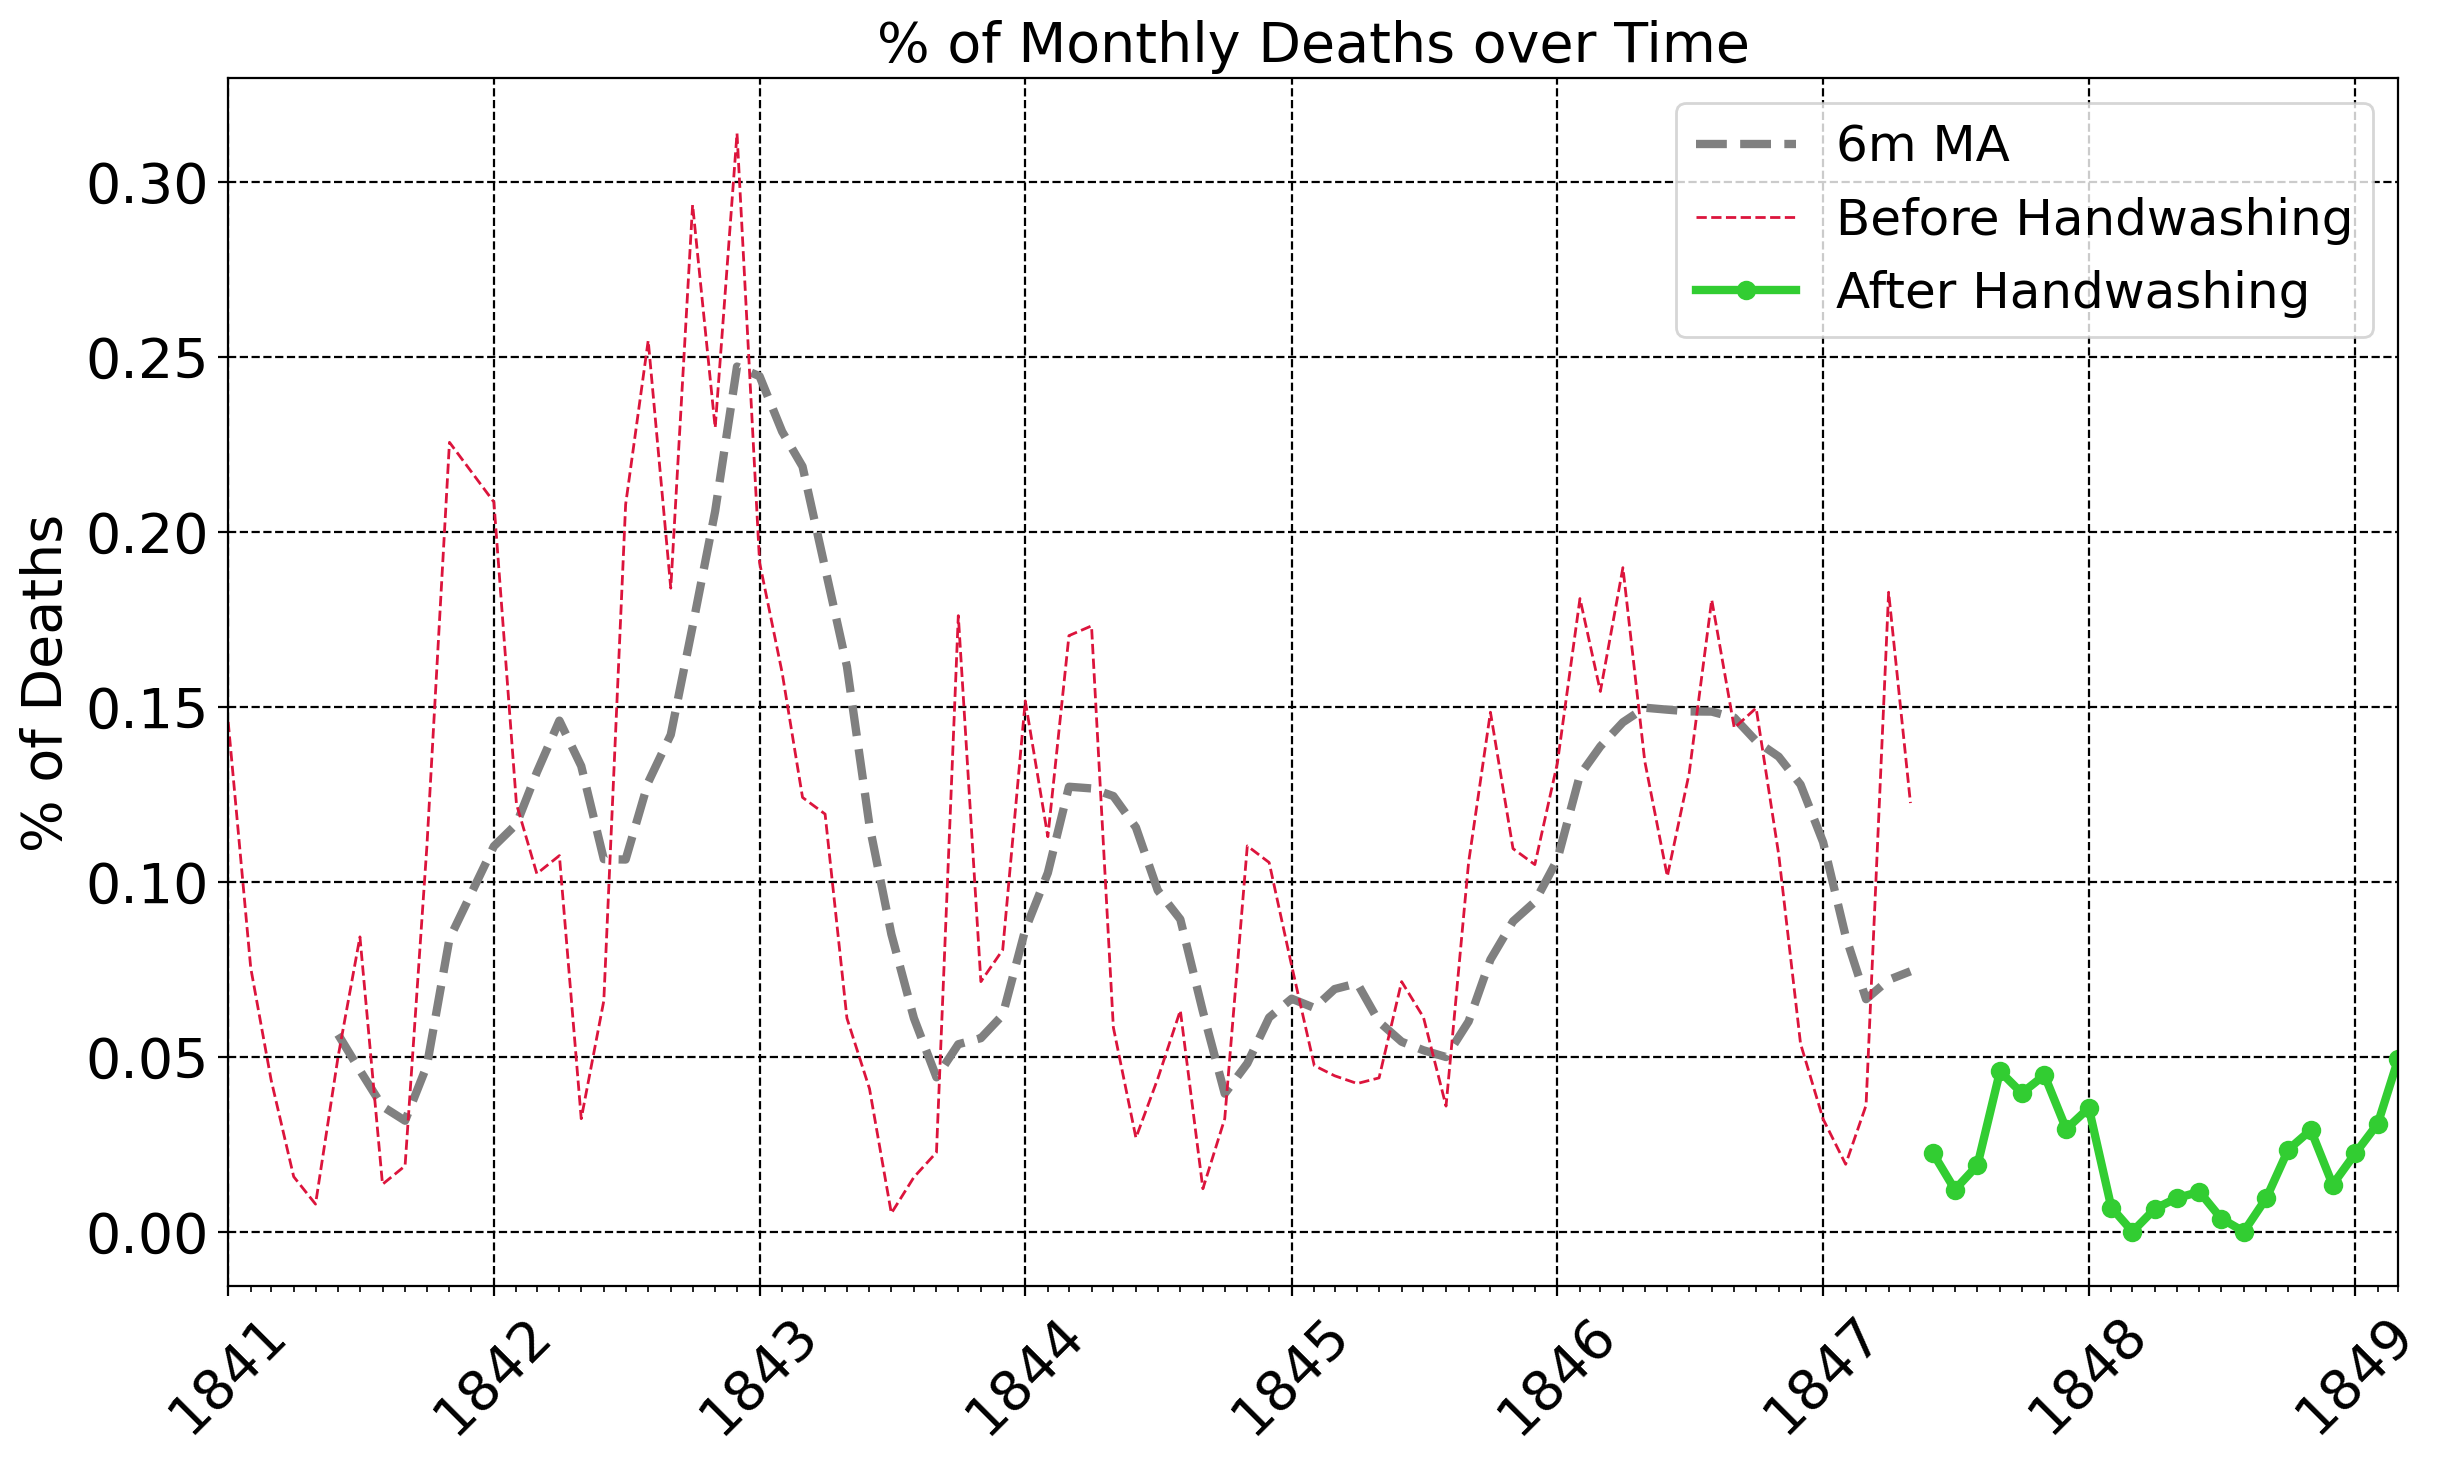

In [47]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('% of Monthly Deaths over Time', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)

plt.ylabel('% of Deaths', color='black', fontsize=20)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='black', linestyle='--')

ma_line, = plt.plot(roll_df.index,
                    roll_df.pct_deaths,
                    color="grey",
                    linewidth=3,
                    linestyle='--',
                    label='6m MA')
bw_line, = plt.plot(b_wash.date,
                    b_wash.pct_deaths,
                    color="crimson",
                    linewidth=1,
                    linestyle='--',
                    label='Before Handwashing')
aw_line, = plt.plot(a_wash.date,
                    a_wash.pct_deaths,
                    color='limegreen',
                    linewidth=3,
                    marker='o',
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()

In [48]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [49]:
box_plot = px.box(df_monthly,
                  x='washing_hands',
                  y='pct_deaths',
                  color='washing_hands',
                  title='How Have the Stats Changed with handwashing?')

box_plot.update_layout(xaxis_title='Washing Hands?',
                       yaxis_title='Percentage of Monthly Deaths',)

box_plot.show()

### Calculate a Rolling Average of the Death Rate

In [50]:
hist_chart = px.histogram(df_monthly,
                          x='pct_deaths',
                          color='washing_hands',
                          nbins=30,
                          opacity=0.6,
                          barmode='overlay',
                          histnorm='percent',
                          marginal='box',)

hist_chart.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist_chart.show()

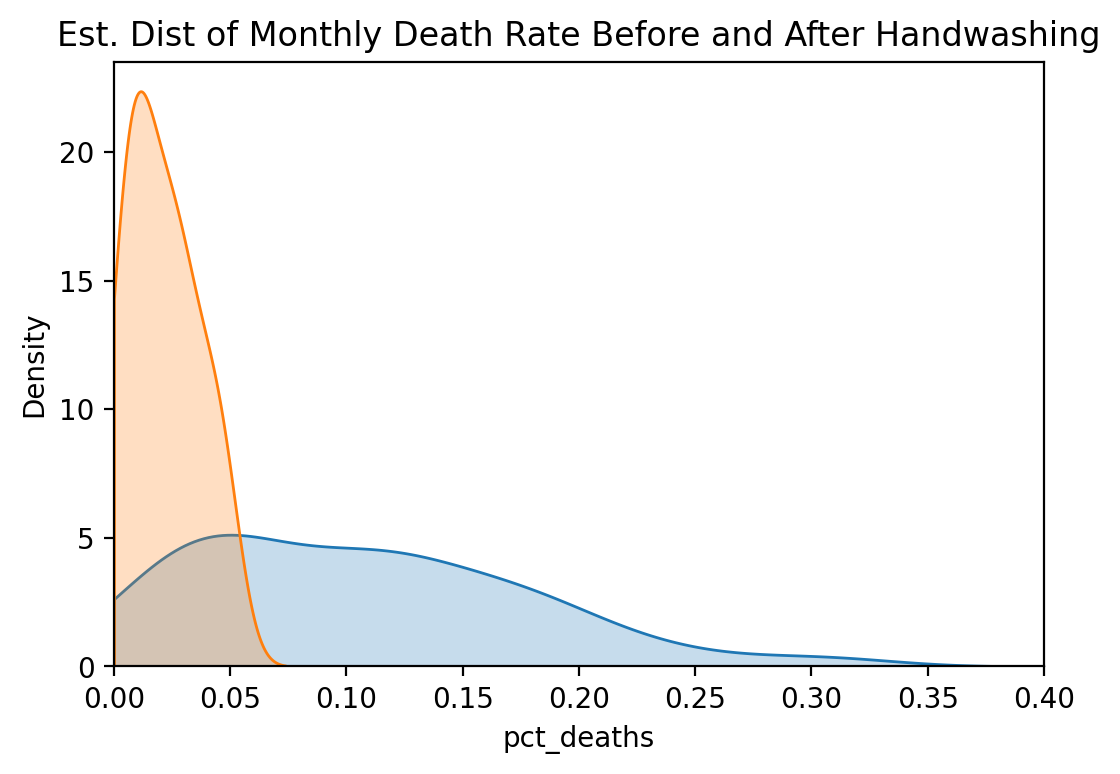

In [52]:
plt.figure(dpi=200)
sns.kdeplot(b_wash.pct_deaths, shade=True, clip=(0,1))
sns.kdeplot(a_wash.pct_deaths, shade=True, clip=(0,1))
plt.title('Est. Dist of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

In [54]:
t_stat, p_value = stats.ttest_ind(a=b_wash.pct_deaths,
                                  b=a_wash.pct_deaths)
print(f'p-value is {p_value:.10f}')
print(f't-statistic is {t_stat:.4}')

p-value is 0.0000002985
t-statistic is 5.512
